In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)), X]
m = len(X_b)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameter

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

"""
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
"""

'\nfor epoch in range(n_epochs):\n    for i in range(m):\n        random_index = np.random.randint(m)\n        xi = X_b[random_index:random_index+1]\n        yi = y[random_index:random_index+1]\n        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)\n        eta = learning_schedule(epoch * m + i)\n        theta = theta - eta * gradients\n'

In [3]:
theta

array([[0.01300189],
       [1.45353408]])

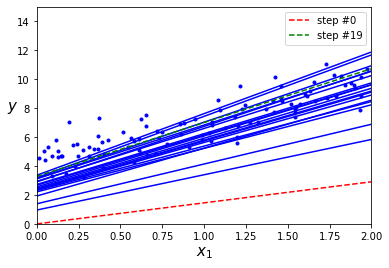

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

plt.plot(X, y, 'b.')  # data set
for epoch in range(n_epochs):
    for i in range(m):
        if i < 20 and epoch == 0:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            style = 'g--' if i == 19 else style
            if i == 0 or i == 19:
                label = "step #" + str(i)
            else:
                label = ""
            plt.plot(X_new, y_predict, style, label=label)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$y$', fontsize=15, rotation=0)
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show() 

In [5]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [6]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.25308539]), array([2.84721086]))

***
## 다항 회귀 polynomial

In [7]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [8]:
X.shape, y.shape

((100, 1), (100, 1))

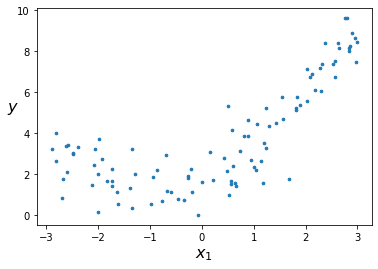

In [9]:
plt.scatter(X, y, 7)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)
plt.show()

#### 만들어진 데이터 셋은 비선형 데이터의 형태를 띄고 있다.

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [11]:
X_poly = poly_features.fit_transform(X)

In [12]:
X[0]

array([0.52161904])

In [13]:
X_poly[0]

array([0.52161904, 0.27208642])

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.81603967]), array([[0.95549329, 0.50407025]]))

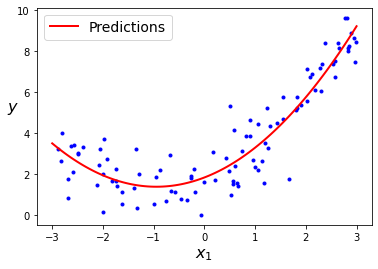

In [15]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label="Predictions")
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=14)
plt.show()

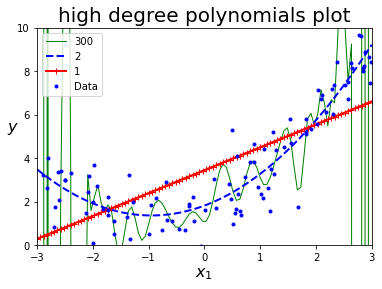

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
"""
model_1 = LinearRegression()
model_1.fit(X, y)
y_new_1 = model_1.predict(X_new)

features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_2 =features_2.fit_transform(X)
model_2 = LinearRegression()
model_2.fit(X_2, y)
X_new_2 = features_2.transform(X_new)
y_new_2 = model_2.predict(X_new_2)

features_300 = PolynomialFeatures(degree=300, include_bias=False)
X_300 =features_300.fit_transform(X)
model_300 = LinearRegression()
model_300.fit(X_300, y)
X_new_300 = features_300.transform(X_new)
y_new_300 = model_300.predict(X_new_300)
"""

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, 'b.', linewidth=3, label='Data')
'''
plt.plot(X_new, y_new_1, 'r-+', linewidth=2, label='1')
plt.plot(X_new, y_new_2, 'b--', linewidth=2, label='2')
plt.plot(X_new, y_new_300, 'g-', linewidth=1, label='300')
'''
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc='upper left')
plt.axis([-3, 3, 0, 10])
plt.title('high degree polynomials plot', fontsize=20)
plt.show()

## learning curve

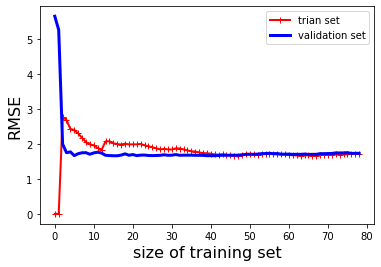

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="trian set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation set")
    plt.xlabel('size of training set', fontsize=16)
    plt.ylabel('RMSE', fontsize=16)
    plt.legend(loc='upper right')
    plt.show()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

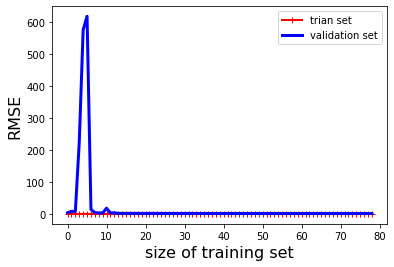

In [18]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_featrues", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

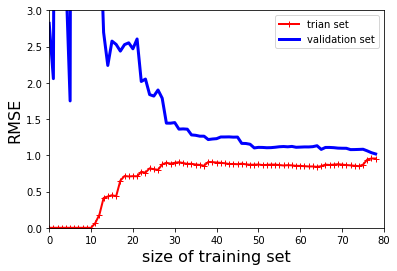

In [19]:
def plot_learning_curves_axis(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="trian set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation set")
    plt.xlabel('size of training set', fontsize=16)
    plt.ylabel('RMSE', fontsize=16)
    plt.legend(loc='upper right')
    plt.axis([0, 80, 0, 3])        # <<추가된 부분>>
    plt.show()

plot_learning_curves_axis(polynomial_regression, X, y)

***
## 규제가 있는 선형 모델

### 릿지 회귀 (Ridge Regression)

In [20]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

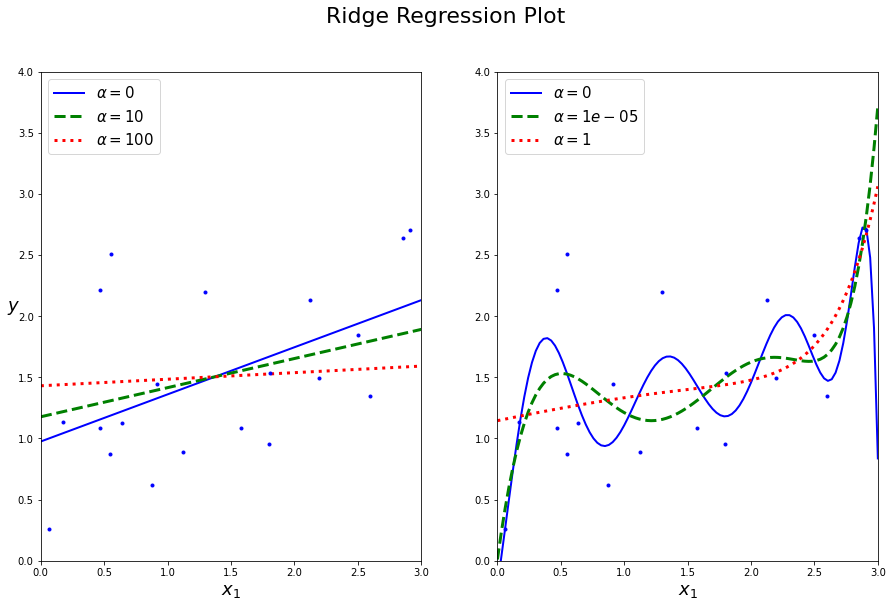

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

def ridge_graph_draw(model_class, polynomial, alphas, yLabel=True, **model_kargs):
    for alpha, width, style in zip(alphas, (2, 3, 3), ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            poly_feautures = PolynomialFeatures(degree=10, include_bias=False)
            std_scaler = StandardScaler()
            model = Pipeline([
                ("poly_features", poly_feautures),
                ("std_scaler", std_scaler),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, label=r"$\alpha = {}$".format(alpha), linewidth=width)
    plt.plot(X, y, 'b.', linewidth=3)
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$y$', rotation=0, fontsize=18)
    if yLabel is False:
        plt.ylabel(None)   # Command for hiding y label
    plt.legend(loc='upper left', fontsize=15)
    plt.axis([0, 3, 0, 4])

fig, ax = plt.subplots(1, 2, figsize=(15,9))
fig.suptitle('Ridge Regression Plot', fontsize=22)

plt.subplot(121)
ridge_graph_draw(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)

plt.subplot(122)
ridge_graph_draw(Ridge, polynomial=True, alphas=(0, 1e-05, 1), yLabel=False, random_state=42)

plt.show()

In [22]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [26]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.4717882])

C:\Users\csp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


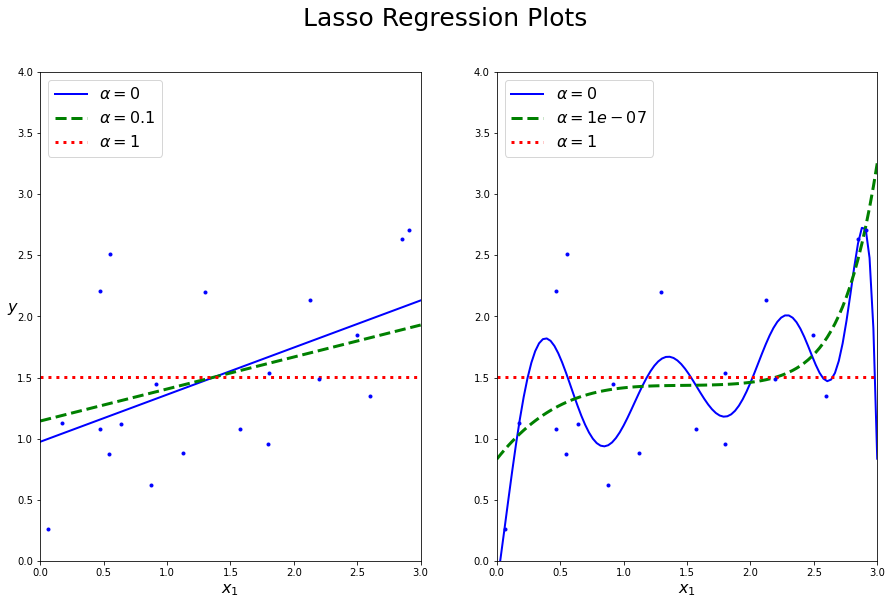

In [35]:
from sklearn.linear_model import Lasso

def lasso_reg_plot(model_class, polynomial, alphas, **model_kargs):
    for alpha, width, style in zip(alphas, (2, 3, 3), ('b-', 'g--', 'r:')):
        model = model_class(alpha=alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_predict = model.predict(X_new)
        plt.plot(X_new, y_predict, style, label=r"$\alpha = {}$".format(alpha), linewidth=width)
    plt.plot(X, y, 'b.', linewidth=10)
    plt.xlabel('$x_1$', fontsize=16)
    plt.ylabel('$y$', rotation=0, fontsize=16)
    plt.legend(loc='upper left', fontsize=16)
    plt.axis([0, 3, 0, 4])

fig, ax = plt.subplots(1, 2, figsize=(15, 9))
fig.suptitle('Lasso Regression Plots', fontsize=25)

plt.subplot(121)
lasso_reg_plot(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)

plt.subplot(122)
lasso_reg_plot(Lasso, polynomial=True, alphas=(0, 1e-07, 1), random_state=42)
plt.ylabel(None)

plt.show()

In [37]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [59]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

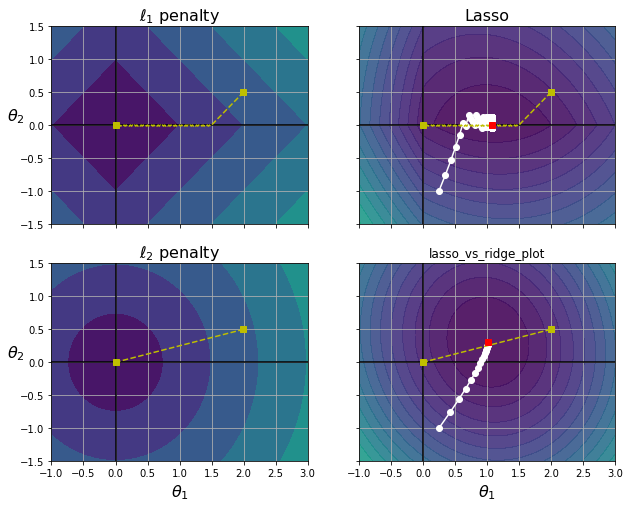

In [60]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

plt.title("lasso_vs_ridge_plot")
plt.show()

In [39]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

***
## Early Stopping

In [48]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [49]:
from copy import deepcopy

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [50]:
print(best_epoch, minimum_val_error)

239 1.351311051245387


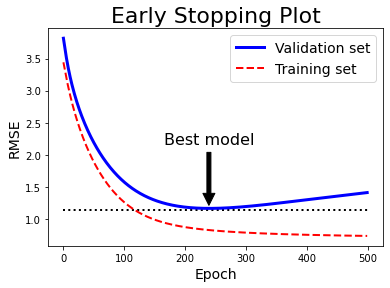

In [56]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

# Draw the arrow
plt.annotate('Best model',
            xy=(best_epoch, best_val_rmse),
            xytext=(best_epoch, best_val_rmse + 1),
            ha="center",
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title('Early Stopping Plot', fontsize=22)
plt.show()

In [57]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))